In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.precision',3)
%matplotlib inline

In [2]:
cd data

/Users/mindy/Documents/flatiron_school/dc_ds_06_03_mod1_project/data


In [3]:
ls

bom.movie_gross.csv    movie_profit_info.pkl  rt.reviews.tsv
imdbcombined.pkl       rt.movie_info.tsv      tmdb.movies.csv


In [4]:
bom = pd.read_csv('bom.movie_gross.csv')

In [16]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [15]:
display(bom.isnull().sum())
bom.shape

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

(3387, 5)

In [17]:
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.150e+08,652000000,2010
1,Alice in Wonderland (2010),BV,3.342e+08,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,2.960e+08,664300000,2010
3,Inception,WB,2.926e+08,535700000,2010
4,Shrek Forever After,P/DW,2.387e+08,513900000,2010


In [19]:
# import the movie budget pickle file 
profit = pd.read_pickle('movie_profit_info.pkl')
profit.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic profit %,world profit %
0,2009-12-18,Avatar,425000000,760507625,2776345279,78.943,553.258
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-41.290,154.667
2,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-87.782,-57.211
3,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,38.840,324.384
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,95.641,315.370


In [25]:
profit.shape

(5782, 7)

In [24]:
#join the two tables to see if any contradition and if extra info along with studio info 
merged_budget = profit.set_index('movie').merge(bom.set_index('title'), how = 'left', left_index= True, right_index=True)

In [26]:
merged_budget.shape

(5782, 10)

In [27]:
merged_budget.head()

,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic profit %,world profit %,studio,domestic_gross_y,foreign_gross,year
#Horror,2015-11-20,1500000,0,0,-100.000,-100.000,NaN,NaN,NaN,NaN
(500) Days of Summer,2009-07-17,7500000,32425665,34439060,332.342,359.187,NaN,NaN,NaN,NaN
10 Cloverfield Lane,2016-03-11,5000000,72082999,108286422,1341.660,2065.728,Par.,7.210e+07,38100000,2016.0
10 Days in a Madhouse,2015-11-11,12000000,14616,14616,-99.878,-99.878,NaN,NaN,NaN,NaN
10 Things I Hate About You,1999-03-31,13000000,38177966,60413950,193.677,364.723,NaN,NaN,NaN,NaN


(401, 388)

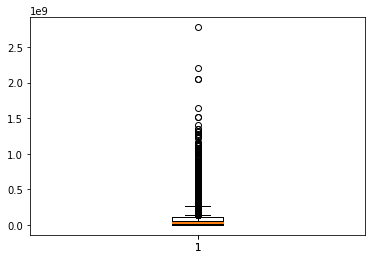

In [49]:
plt.boxplot(merged_budget.domestic_gross_x)
plt.boxplot(merged_budget.worldwide_gross)
merged_budget.worldwide_gross.min(), merged_budget.domestic_gross_x.min() # 0 Nan value 
# seems like some numbers are unsually small 

In [46]:
# remove 0 values 
merged_budget = merged_budget[(~(merged_budget.domestic_gross_x==0)) & (~(merged_budget.worldwide_gross==0))]

In [51]:
# check again 
merged_budget.worldwide_gross.min(), merged_budget.domestic_gross_x.min() 

(401, 388)

In [52]:
# very small value let's investigate
merged_budget[(merged_budget.worldwide_gross == 401)|(merged_budget.domestic_gross_x == 388)]
# neither make sense on the internet 

,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic profit %,world profit %,studio,domestic_gross_y,foreign_gross,year
Barbecue,2014-12-26,10000000,388,247565,-99.996,-97.524,NaN,NaN,NaN,NaN
The Rise and Fall of Miss Thang,2008-08-14,10000,401,401,-95.990,-95.990,NaN,NaN,NaN,NaN


In [62]:
# for more accuracy we will drop 5% quantile 
merged_budget = merged_budget[(merged_budget.worldwide_gross >= merged_budget.worldwide_gross.quantile(0.05))\
              &(merged_budget.domestic_gross_x >= merged_budget.domestic_gross_x.quantile(0.05))]

In [69]:
min(merged_budget.domestic_gross_x), min(merged_budget.worldwide_gross)

(61611, 146083)

In [70]:
merged_budget[(merged_budget.worldwide_gross == 61611)|(merged_budget.domestic_gross_x == 146083)]  # checks out online

,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic profit %,world profit %,studio,domestic_gross_y,foreign_gross,year
The Land Girls,1998-06-12,8000000,146083,146083,-98.174,-98.174,NaN,NaN,NaN,NaN


In [71]:
merged_budget.head()

,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic profit %,world profit %,studio,domestic_gross_y,foreign_gross,year
(500) Days of Summer,2009-07-17,7500000,32425665,34439060,332.342,359.187,NaN,NaN,NaN,NaN
10 Cloverfield Lane,2016-03-11,5000000,72082999,108286422,1341.660,2065.728,Par.,7.210e+07,38100000,2016.0
10 Things I Hate About You,1999-03-31,13000000,38177966,60413950,193.677,364.723,NaN,NaN,NaN,NaN
"10,000 B.C.",2008-03-07,105000000,94784201,269065678,-9.729,156.253,NaN,NaN,NaN,NaN
102 Dalmatians,2000-11-22,85000000,66941559,66941559,-21.245,-21.245,NaN,NaN,NaN,NaN


In [88]:
# studio is not relevant for microsoft as they are trying to make their own movie 
# we will also check for consistency in data
compare_budget = merged_budget.dropna(axis = 0, subset= ['year','domestic_gross_y', 'foreign_gross'])

In [93]:
compare1 = compare_budget.release_date.dt.year == compare_budget.year
compare1.all()# not all match

False

In [99]:
# compare_budget[~compare1]  # appears the release_date is correct 
compare_budget[~compare1]

,release_date,production_budget,domestic_gross_x,worldwide_gross,domestic profit %,world profit %,studio,domestic_gross_y,foreign_gross,year
A Monster Calls,2017-01-06,43000000,3740823,46414530,-91.300,7.941,Focus,3.700e+06,43600000,2016.0
Albert Nobbs,2011-12-21,7500000,3014696,8539003,-59.804,13.853,RAtt.,3.000e+06,2600000,2012.0
City of Ghosts,2003-04-25,17500000,325491,325491,-98.140,-98.140,IFC,1.280e+05,100000,2017.0
Fantastic Four,2005-07-08,87500000,154696080,333132750,76.796,280.723,Fox,5.610e+07,111900000,2015.0
Legend,1986-04-18,25000000,15502112,23506237,-37.992,-5.975,Uni.,1.900e+06,41100000,2015.0
On the Road,2013-03-22,25000000,720828,9313302,-97.117,-62.747,IFC,7.440e+05,8000000,2012.0
Robin Hood,2018-11-21,99000000,30824628,84747441,-68.864,-14.397,Uni.,1.053e+08,216400000,2010.0
Selma,2015-01-09,20000000,52076908,66776576,160.385,233.883,Par.,5.210e+07,14700000,2014.0
The Girl on the Train,2016-10-07,45000000,75395035,174278214,67.545,287.285,Strand,2.080e+05,97100,2010.0
The Girl with the Dragon Tattoo,2011-12-20,90000000,102515793,239373970,13.906,165.971,MBox,1.010e+07,94300000,2010.0


In [100]:
# appears that some movies with the same name but remade especially thos off by more than one year
# everything seems to check out for the budget data, we will get rid of columns studio to year 

In [101]:
merged_budget.drop(columns = ['studio','domestic_gross_y', 'foreign_gross','year'], inplace = True)

In [104]:
merged_budget.rename(columns={'domestic_gross_x':'domestic_gross'}, inplace = True)

In [105]:
merged_budget.to_pickle('budget_profit_merged.pkl')

In [106]:
ls

bom.movie_gross.csv       movie_profit_info.pkl     tmdb.movies.csv
budget_profit_merged.pkl  rt.movie_info.tsv
imdbcombined.pkl          rt.reviews.tsv


In [108]:
pd.read_pickle('budget_profit_merged.pkl').shape

(4900, 6)